In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
plt.rcParams["font.size"] = 8
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
data_dir = Path('parkinsons_dataset')
data_dir

WindowsPath('parkinsons_dataset')

In [21]:
df = pd.DataFrame({'path': list(data_dir.glob('*/*.png'))})
df['img_id'] = df['path'].map(lambda x: x.stem)
df['disease'] = df['path'].map(lambda x: x.parent.stem)
print(df.shape, 'images loaded')
df.head()

(831, 3) images loaded


,path,img_id,disease
0,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_001,normal
1,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_002,normal
2,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_003,normal
3,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_004,normal
4,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_005,normal


In [22]:
df['path'] = df['path'].apply(lambda x: Path(x))

def extract_prefix(file_path):
    prefix = file_path.stem.rsplit('_', 1)[0]
    return prefix

df['label'] = df['path'].apply(extract_prefix)
df

,path,img_id,disease,label
0,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_001,normal,ep2d_diff_3scan_trace_p2_ADC_DFC
1,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_002,normal,ep2d_diff_3scan_trace_p2_ADC_DFC
2,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_003,normal,ep2d_diff_3scan_trace_p2_ADC_DFC
3,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_004,normal,ep2d_diff_3scan_trace_p2_ADC_DFC
4,parkinsons_dataset\normal\ep2d_diff_3scan_trac...,ep2d_diff_3scan_trace_p2_ADC_DFC_005,normal,ep2d_diff_3scan_trace_p2_ADC_DFC
...,...,...,...,...
826,parkinsons_dataset\parkinson\T2W_TSE_014.png,T2W_TSE_014,parkinson,T2W_TSE
827,parkinsons_dataset\parkinson\T2W_TSE_015.png,T2W_TSE_015,parkinson,T2W_TSE
828,parkinsons_dataset\parkinson\T2W_TSE_016.png,T2W_TSE_016,parkinson,T2W_TSE
829,parkinsons_dataset\parkinson\T2W_TSE_017.png,T2W_TSE_017,parkinson,T2W_TSE


In [23]:
df['label'].value_counts()

label
t1_fl3d_sag_p4_iso_1.0                 176
Mag_Images                              72
SWI_Images                              72
Pha_Images                              72
mIP_Images(SW)                          65
ep2d_diff_3scan_trace_p2_TRACEW_DFC     60
Reg_-_sDW_SSh_SENSE                     44
sDW_SSh                                 44
DUAL_TSE                                44
ep2d_diff_3scan_trace_p2_ADC_DFC        30
t2_tirm_tra_dark-fluid                  30
t2_tse_tra                              30
T1W_FFE                                 22
dReg_-_sDW_SSh_SENSE                    22
T2W_FLAIR                               22
T2W_TSE                                 18
Survey_SHC                               5
localizer                                3
Name: count, dtype: int64

In [24]:
df.nunique()

path       831
img_id     831
disease      2
label       18
dtype: int64

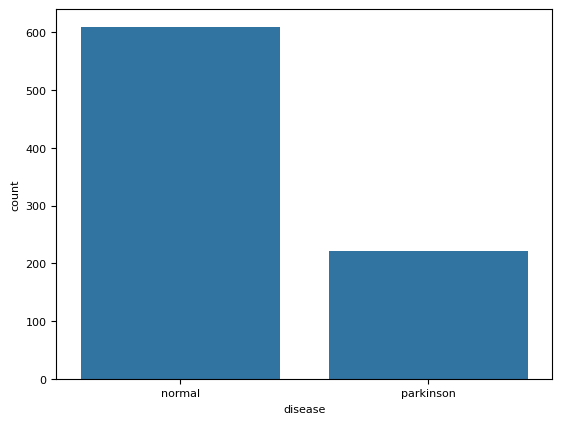

In [25]:
sns.countplot(df, x='disease')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = df['path']
y = df['disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(664,) (664,)
(167,) (167,)


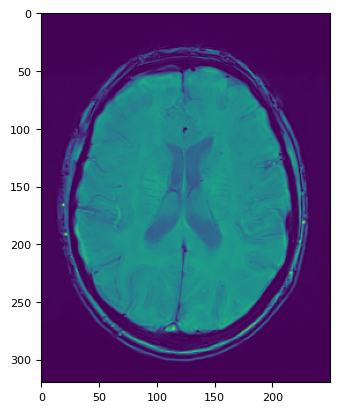

(320, 250)

In [28]:
image = plt.imread(X_train.iloc[1])
plt.imshow(image)
plt.show()

image.shape

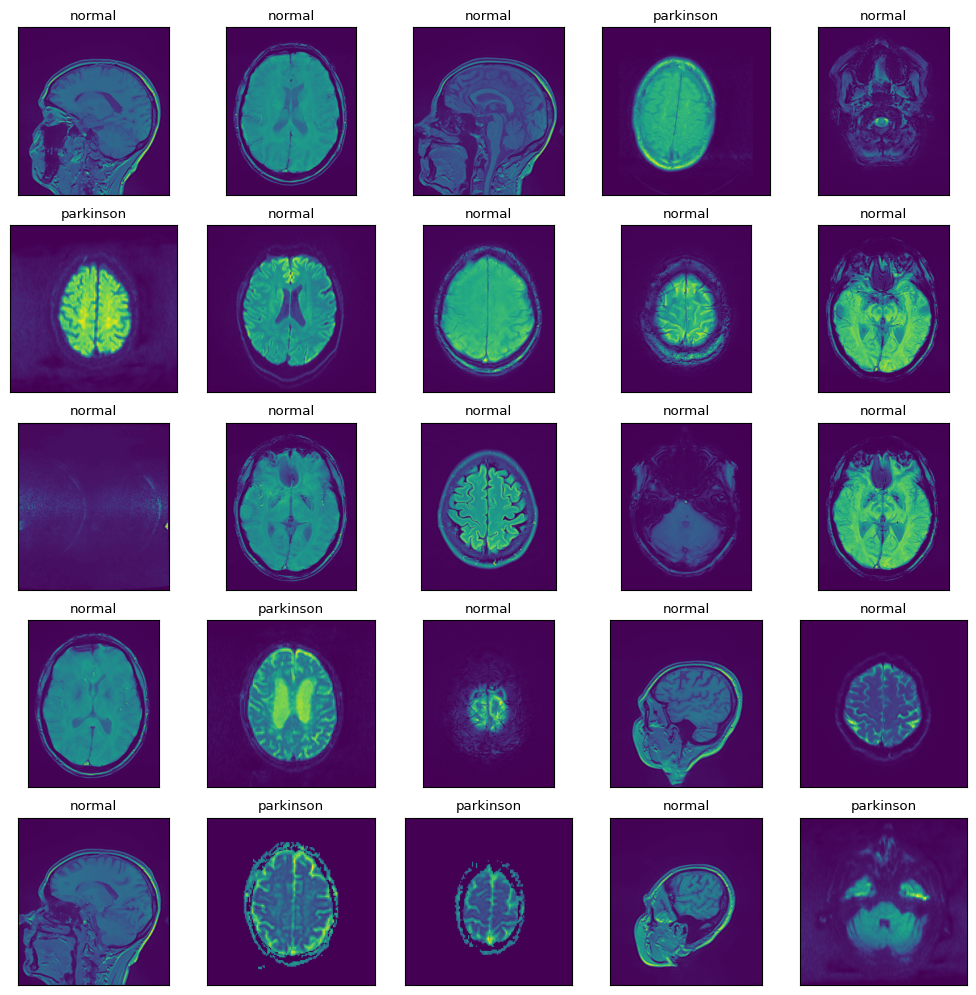

In [29]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_train.iloc[i]))
    ax.set_title(y_train.iloc[i])
plt.tight_layout()
plt.show()

In [30]:
trainData = pd.DataFrame({'path':X_train, 'disease':y_train})
trainData.loc[:, 'path'] = trainData['path'].astype(str)

# train_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# 
train_generator = train_datagen.flow_from_dataframe(
    dataframe=trainData,
    x_col='path',         
    y_col='disease',      
    target_size=(224, 224), 
    batch_size=32,        
    class_mode='binary'
)

Found 664 validated image filenames belonging to 2 classes.


In [31]:
testData = pd.DataFrame({'path':X_test, 'disease':y_test})
testData.loc[:, 'path'] = testData['path'].astype(str)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=testData,
    x_col='path',         
    y_col='disease',      
    target_size=(224, 224), 
    batch_size=32,        
    class_mode='binary'
)

Found 167 validated image filenames belonging to 2 classes.


In [32]:
def loss_history_plot(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

In [33]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model, Sequential

from tensorflow.keras.optimizers import Adam

In [34]:
def train_model(base_model):
    for layer in base_model.layers[:-5]:
            layer.trainable = False
    
    top_model = base_model.output
    top_model = Flatten(name="flatten")(top_model)
#     top_model = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(1, activation='sigmoid')(top_model)
    model = Model(inputs=base_model.input, outputs=output_layer)
    
    
#     new_learning_rate = 0.0001 
#     custom_optimizer = Adam(learning_rate=new_learning_rate)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    
    history = model.fit(train_generator, epochs=25, validation_data=test_generator, batch_size = 32)
    
    return model, history

# VGG 16

In [35]:
from keras.applications import VGG16
from tensorflow.keras import regularizers

In [36]:
VGG = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [37]:
model, history = train_model(VGG)

c:\Users\ADMIN\Desktop\v1\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.6767 - loss: 0.7824 - val_accuracy: 0.6707 - val_loss: 0.6076
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.7397 - loss: 0.4914 - val_accuracy: 0.7186 - val_loss: 0.4621
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.7983 - loss: 0.3906 - val_accuracy: 0.9162 - val_loss: 0.2628
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 0.8575 - loss: 0.2924 - val_accuracy: 0.9401 - val_loss: 0.1827
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.9449 - loss: 0.1395 - val_accuracy: 0.9581 - val_loss: 0.1586
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.9490 - loss: 0.0919 - val_accuracy: 0.9760 - val_loss: 0.0990
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.9763 - loss: 0.0734 - val_accuracy: 0.9701 - val_loss: 0.1448
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.9672 - loss: 0.0896 - val_accuracy: 0.9760 - v

In [38]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,948,805 (110.43 MB)

 Trainable params: 7,104,513 (27.10 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 14,209,028 (54.20 MB)

In [56]:
model.save('model_2.h5')

In [39]:
predictions = model.predict(test_generator)
predictions = [1 if x>0.5 else 0 for x in predictions]
true_labels = test_generator.classes
confusion_mtx = confusion_matrix(true_labels, predictions) 
confusion_mtx

6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step


array([[74, 38],
       [43, 12]])

In [40]:
accuracy = accuracy_score(true_labels, predictions)
print('Val Accuracy = %.2f' % accuracy)

Val Accuracy = 0.51


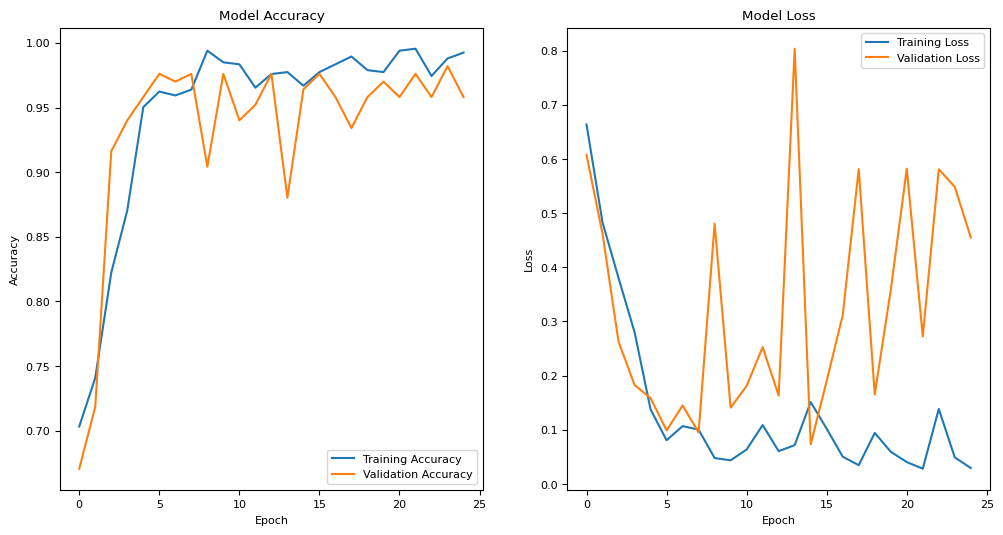

In [41]:
loss_history_plot(history)

# RESNET50

In [42]:
from keras.applications import ResNet50

In [43]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [44]:
model, history = train_model(resnet)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6490 - loss: 2.4059 - val_accuracy: 0.6707 - val_loss: 3.9067
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7502 - loss: 0.6424 - val_accuracy: 0.6707 - val_loss: 6.2525
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8116 - loss: 0.4937 - val_accuracy: 0.6766 - val_loss: 4.3785
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.8031 - loss: 0.4945 - val_accuracy: 0.6707 - val_loss: 5.8024
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.7928 - loss: 0.4589 - val_accuracy: 0.6766 - val_loss: 4.9361
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7863 - loss: 0.4784 - val_accuracy: 0.7844 - val_loss: 0.8221
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7965 - loss: 0.5202 - val_accuracy: 0.6946 - val_loss: 2.8595
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8231 - loss: 0.4254 - val_accuracy: 0.7126 - val_loss:

In [45]:
predictions = model.predict(test_generator)
predictions = [1 if x>0.5 else 0 for x in predictions]
true_labels = test_generator.classes

confusion_mtx = confusion_matrix(true_labels, predictions) 
confusion_mtx

6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


array([[102,  10],
       [ 51,   4]])

In [55]:
model.save('model_1.h5')

In [46]:
accuracy = accuracy_score(true_labels, predictions)
print('Val Accuracy = %.2f' % accuracy)

Val Accuracy = 0.63


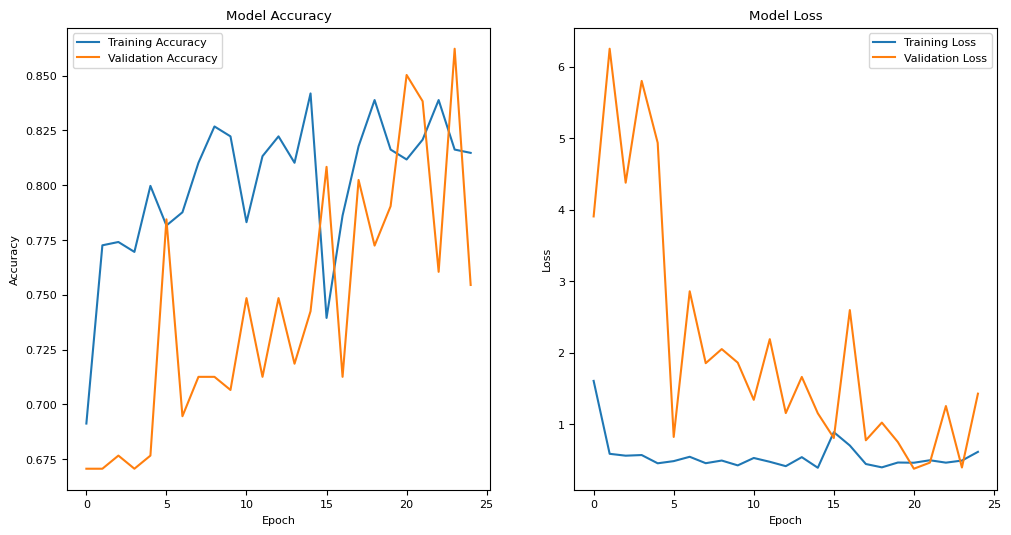

In [47]:
loss_history_plot(history)

# InceptionV3

In [48]:
from keras.applications import InceptionV3

In [49]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [50]:
model, history = train_model(inception)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5904 - loss: 2.5327 - val_accuracy: 0.8443 - val_loss: 0.6276
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8847 - loss: 0.3745 - val_accuracy: 0.9162 - val_loss: 0.3194
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9161 - loss: 0.2312 - val_accuracy: 0.9521 - val_loss: 0.1654
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9269 - loss: 0.2822 - val_accuracy: 0.9641 - val_loss: 0.0600
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9376 - loss: 0.1878 - val_accuracy: 0.9581 - val_loss: 0.1304
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9399 - loss: 0.1975 - val_accuracy: 0.9701 - val_loss: 0.0752
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9661 - loss: 0.0753 - val_accuracy: 0.9820 - val_loss: 0.0528
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9616 - loss: 0.1255 - val_accuracy: 0.9701 - val_loss:

In [51]:
predictions = model.predict(test_generator)
predictions = [1 if x>0.5 else 0 for x in predictions]
true_labels = test_generator.classes

confusion_mtx = confusion_matrix(true_labels, predictions) 
confusion_mtx

6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


array([[80, 32],
       [32, 23]])

In [54]:
model.save('model.h5')

In [52]:
accuracy = accuracy_score(true_labels, predictions)
print('Val Accuracy = %.2f' % accuracy)

Val Accuracy = 0.62


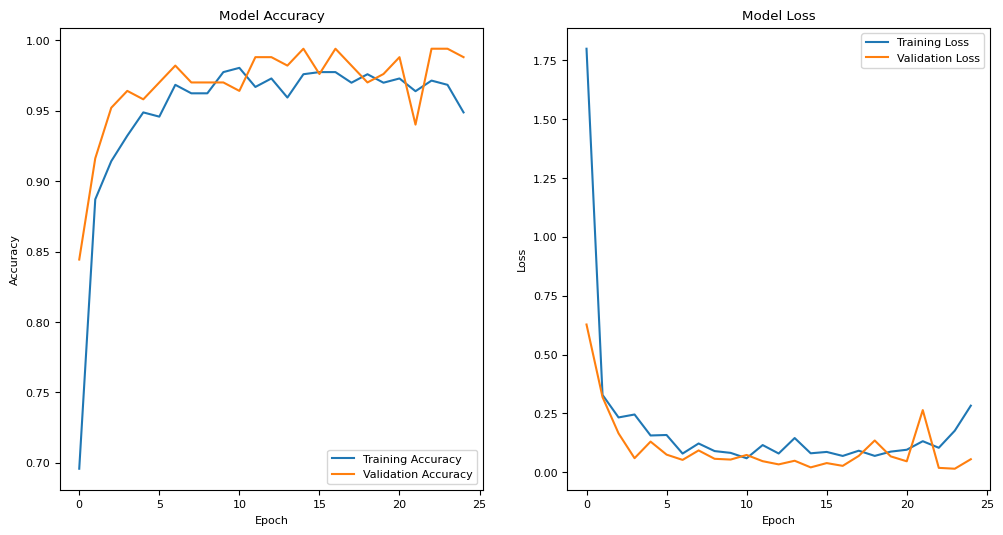

In [53]:
loss_history_plot(history)